In [19]:
# my imports

# import TensorFlow
import tensorflow as tf

# import numpy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import logistic regression
from sklearn.linear_model import LogisticRegression
# import decision tree
from sklearn.tree import DecisionTreeClassifier
# import random forest
from sklearn.ensemble import RandomForestClassifier
# import hp tuning
from sklearn.model_selection import GridSearchCV
# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# import pickle
import pickle

# Is the Performance of Artificial Neural Networks Superior to Classical ML Models in Recognizing Handwritten Digits?
## A Comparative Study Using the MNIST Dataset

### **Abstract**:
This project explores the performance differences between classical Machine Learning (ML) models and Artificial Neural Networks (ANNs) for recognizing handwritten digits, using the MNIST dataset. We evaluate three classical ML models: Logistic Regression, Decision Tree, and Random Forest, and compare their performance metrics against an Artificial Neural Network (ANN), which is a popular deep learning architecture for image recognition tasks. The comparison will be based on precision, recall, F1-score, and accuracy. The best-performing classical ML model will undergo hyperparameter tuning using GridSearchCV algorithm, and its optimized performance will be compared with that of the ANN model. This approach aims to identify the most efficient and accurate model for handwritten digit recognition and analyze their relative strengths and weaknesses.

#### **1. Introduction:**
Handwritten digit recognition is a critical benchmark problem in machine learning (ML) and artificial intelligence (AI), with wide-ranging applications in document digitization, banking systems, and automated data entry. One of the most widely used datasets for this task is the MNIST dataset, a curated collection of 70,000 grayscale images of handwritten digits. Its simplicity and versatility have made it a standard for testing and comparing machine learning algorithms.

Machine learning offers two primary paradigms for solving this problem: classical ML models and artificial neural networks (ANNs). Classical ML models, such as Logistic Regression, Decision Tree, and Random Forest, are designed to extract patterns from data and make predictions using well-understood mathematical and statistical principles. These models are often computationally efficient and interpretable, making them ideal for tasks with limited resources or when model explainability is critical.

On the other hand, ANNs have emerged as powerful tools for image recognition tasks. ANNs leverage hierarchical feature extraction techniques to identify patterns in data with high accuracy. These models, while more computationally intensive, have been shown to outperform classical ML models in many real-world applications due to their ability to learn complex, non-linear relationships in data.

This project aims to compare the performance of classical ML models and ANNs in recognizing handwritten digits using the MNIST dataset. Specifically, it evaluates three classical ML models—Logistic Regression, Decision Tree, and Random Forest—based on precision, recall, F1-score, and accuracy. The best-performing classical ML model will undergo hyperparameter tuning to optimize its performance, and the results will be compared with those of a Feed Forward Neural Network (FNN).

The ultimate goal is to determine whether ANNs significantly outperform classical ML models and to identify the strengths and limitations of each approach. This analysis will provide insights into their practical applications, offering a comprehensive perspective on the effectiveness of classical and modern machine learning techniques in handling real-world data.

#### **2. Background:**
- **Explanation of classical ML models:**
  - **Logistic Regression**: A probabilistic classifier that models the likelihood of class membership. Logistic regression, one of the foundational machine learning models, is a statistical technique used for binary classification tasks. It predicts probabilities using a logistic (sigmoid) function to map linear relationships to a bounded output between 0 and 1. This makes logistic regression particularly effective for problems such as email spam detection or determining the presence of a disease. It is commonly implemented in Python using Scikit-learn, which supports various extensions, including multiclass classification through the one-vs-rest strategy and regularization options like L1 and L2 to prevent overfitting. Key metrics for evaluating logistic regression include accuracy, precision, recall, and F1-score, particularly useful when dealing with imbalanced datasets.
  - **Decision Tree**: A tree-structured model for decision-making. Decision Trees are another classic model type, operating by splitting data into subsets based on feature thresholds. They are intuitive and capable of handling both numerical and categorical data.
  - **Random Forest**: An ensemble of decision trees to improve generalization and accuracy. As Decision Tree models can suffer from overfitting, this limitation is addressed by ensemble methods such as Random Forests, which aggregate the predictions of multiple decision trees to enhance accuracy and robustness. Scikit-learn's implementation of Decision Trees and Random Forests offers features like Gini impurity or entropy for splitting criteria and support for parameter tuning to optimize model performance.

- **Feed Forward Neural Networks (FNNs)**: A neural network architecture specifically designed for image recognition. Feed Forward Neural Networks (FNNs) belong to the deep learning paradigm and are designed to handle grid-like data structures such as images. FNNs extract hierarchical features using Dense (fully connected) layers, which do not preserve spatial relationships in the input data, making them highly effective for image recognition tasks like digit classification in the MNIST dataset. Frameworks like TensorFlow simplify the implementation of FNNs with their high-level APIs, enabling efficient training and deployment of models.

This project compares these methods across classification metrics such as precision, recall, F1-score, and accuracy, with a focus on determining whether FNNs significantly outperform classical models. Hyperparameter tuning will be applied to the best-performing classical model to ensure a fair and comprehensive comparison.

#### **3. Dataset:**
- **Description of the MNIST dataset**: The MNIST dataset is a benchmark dataset in machine learning and computer vision, widely used for handwritten digit classification tasks. It consists of 70,000 grayscale images of handwritten digits ranging from 0 to 9, divided into two subsets: a training set of 60,000 images and a test set of 10,000 images. Each image is a 28x28 pixel grid, making it compact and suitable for computational modeling.

- **Key Features**:
  - **Pixel Intensity**: Each pixel's intensity ranges from 0 to 255, representing grayscale values.
  - **Labels**: The dataset includes labels for each image, corresponding to the digit depicted.
  - **Preprocessing**: Data is often normalized to the [0, 1] range and reshaped into a 28x28x1 format for compatibility with neural networks.
  - **Use Cases**: Primarily used for evaluating algorithms in supervised learning, particularly for image classification tasks, and serves as a starting point for deep learning models, such as convolutional neural networks.

This dataset was derived from the original NIST datasets and curated by Yann LeCun, Corinna Cortes, and Christopher J.C. Burges. It is freely accessible through platforms like TensorFlow and Keras, which provide utilities for easy loading and processing

In [2]:
# Load in the data from the TensorFlow Kers MNIST handwritten digits dataset

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# Print shape of (x_train, y_train), (x_test, y_test)

print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
print("x_test.shape:", x_test.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


In [4]:
x_train[0].shape

(28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [6]:
y_train[0]

5

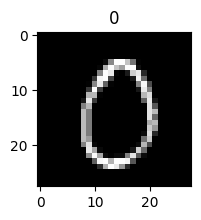

In [7]:
# Plot x_train[210] using mpl

plt.figure(figsize=(2,2))
plt.imshow(x_train[210], cmap='gray')
plt.title(y_train[210])
plt.show()

By plotting a histogram of target values (y) we can check how balanced the dataset is.

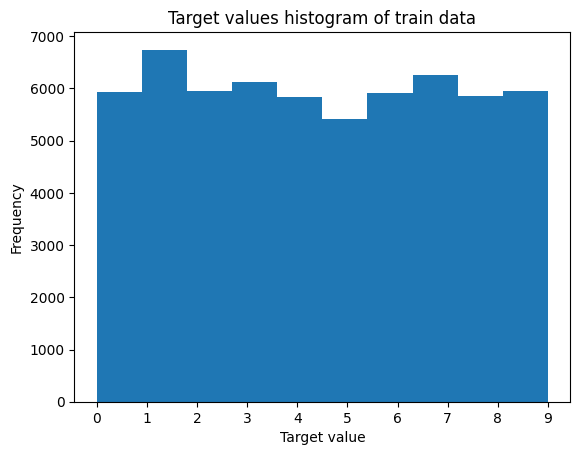

In [12]:
# target values histogram of train data

plt.hist(y_train)
plt.title("Target values histogram of train data")
plt.xlabel("Target value")
plt.ylabel("Frequency")
plt.xticks(range(10))
plt.show()

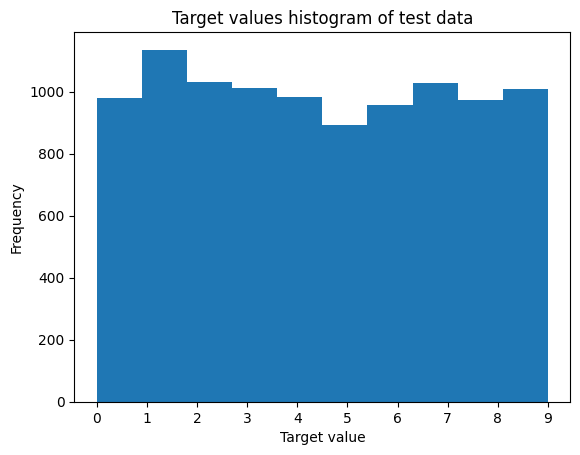

In [13]:
# target values histogram of test data

plt.hist(y_test)
plt.title("Target values histogram of test data")
plt.xlabel("Target value")
plt.ylabel("Frequency")
plt.xticks(range(10))
plt.show()

We can see from the two histograms that the MNIST dataset is well balanced with just a slight predominance of '1' which might be one of the reasons why '1' value has the best performance.

**Dataset normalizing**

* **Purpose of Normalization:**

Normalization rescales data to a specific range, often [0, 1]. This process helps in stabilizing and accelerating the training of machine learning models by preventing numerical instability and ensuring consistent feature scaling.
Pixel values in the MNIST dataset range from 0 to 255, representing grayscale intensities. Dividing by 255 transforms these values into the range [0, 1].

* **Impact on Training:**

Improved Gradient Descent Behavior: Neural networks optimize weights using gradient descent. Normalization helps gradients flow more efficiently, avoiding issues like vanishing or exploding gradients.
Uniform Feature Scale: All features are in the same scale, preventing dominance by any single feature and making the model converge faster.

By performing this normalization, the dataset becomes well-suited for training neural networks or other machine learning models that are sensitive to the scale of input data.

In [8]:
# Normalizing

x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


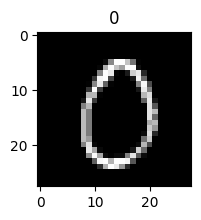

In [9]:
# Plot x_train[210] using mpl

plt.figure(figsize=(2,2))
plt.imshow(x_train[210], cmap='gray')
plt.title(y_train[210])
plt.show()


#### **4. Methodology:**

All experiments are run on a Google Colab infrastructure with T4 GPU runtime.

- Implementation of each model:
  - **Classical ML models**:
    1. Logistic Regression - implemented with default parameters
    2. Decision Tree - implemented with default parameters
    3. Random Forest - implemented with default parameters
  - Evaluation of models based on:
    - Precision
    - Recall
    - F1-score
    - Accuracy
  - Selection of the best-performing classical ML model based on the evaluation metrics.
  - Hyperparameter tuning of the selected classical ML model to optimize performance. The following hyperparameters were used for tuning: "n_estimators", "min_samples_leaf", "min_samples_split".
  - **Feed Forward Neural Network** (ANN-based model). Dense (hidden) layer with 128 units and ReLU activation was used. Two models were tested with and without Dropout layer. The optimizer used is 'adam' and the loss function chosen is  'sparse_categorical_crossentropy'. Output layer with 10 units and 'softmax' activation
- Cross-validation techniques and split between training and testing data was done based on the dataset default train / test split.

* **Flattening the images:**

In order to train the classic models we need to flatten the images in a n_samples, 784_features matrix using np.reshape(n, -1).

To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (28, 28) into shape (784,). Subsequently, the entire dataset will be of shape (n_samples, n_features), where n_samples is the number of images and n_features is the total number of pixels in each image. As x_test, x_train is of type numpy.ndarray we can use np.reshape((-1, 28*28)). By using the '-1' as value form number of columns NumPy calculates the number of columns automatically by dividing the total number of elements in the array by n_samples.

#### **5. Performance Metrics:**
&nbsp;&nbsp;&nbsp;&nbsp;The following metrics were considered while assessing the models performance:
- **Precision:** The ratio of correctly predicted positive observations to the total predicted positives. High precision indicates fewer false positives.
- **Recall:** The ratio of correctly predicted positive observations to all actual positives. High recall indicates fewer false negatives.
- **F1-Score:** The weighted average of precision and recall. It provides a balance between precision and recall.
- **Support:** The number of true instances for each label.
- **Accuracy:** The set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
- **Confusion matrix** a performance measurement tool for classification models, offering a detailed breakdown of prediction results across various classes. It provides insights into the types and frequencies of errors made by the model.

Logistic regression

In [14]:
# logistic regression

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(x_train.reshape(-1, 28*28), y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
# accuracy score

print("Accuracy score:", logreg.score(x_test.reshape(-1, 28*28), y_test))

Accuracy score: 0.9258


In [16]:
# classification report

print("Classification report:\n", classification_report(y_test, logreg.predict(x_test.reshape(-1, 28*28))))

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.91      0.88      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



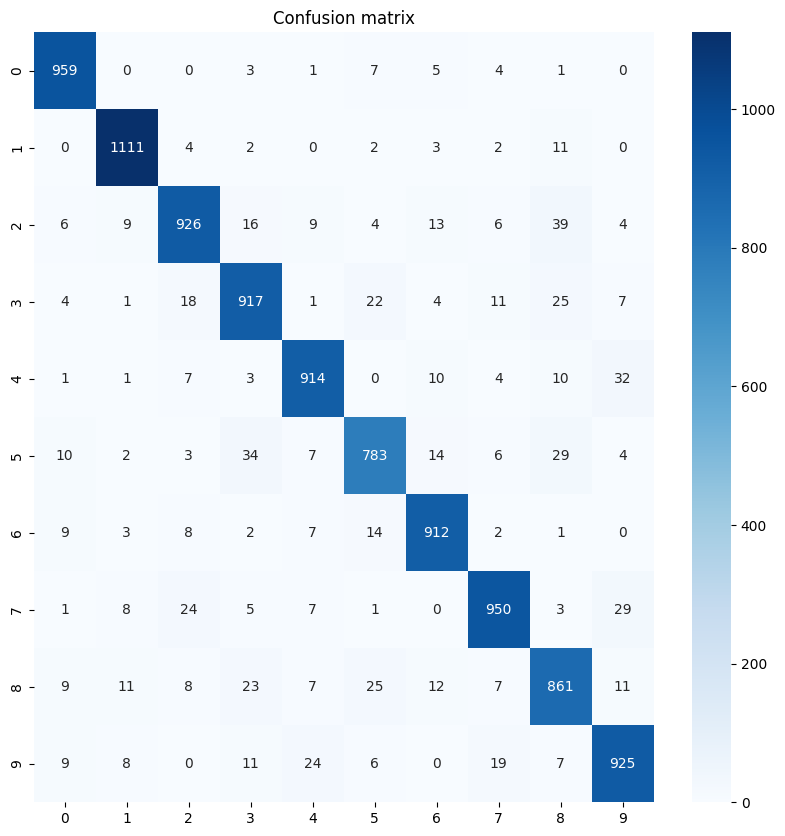

In [26]:
# plot confusion matrix

plt.figure(figsize=(10,10))
plt.title("Confusion matrix")
sns.heatmap(confusion_matrix(y_test, logreg.predict(x_test.reshape(-1, 28*28))), annot=True, fmt='d', cmap='Blues')
plt.show()

Decision Tree

In [22]:
# decision tree

# Create a decision tree model
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(x_train.reshape(-1, 28*28), y_train)

DecisionTreeClassifier()

In [23]:
# accuracy score

print("Accuracy score:", dt.score(x_test.reshape(-1, 28*28), y_test))

Accuracy score: 0.8779


In [24]:
# classification report

print("Classification report:\n", classification_report(y_test, dt.predict(x_test.reshape(-1, 28*28))))

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.95      0.95      1135
           2       0.87      0.85      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.87      0.88      0.88       982
           5       0.83      0.84      0.84       892
           6       0.91      0.88      0.89       958
           7       0.92      0.90      0.91      1028
           8       0.82      0.81      0.82       974
           9       0.86      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



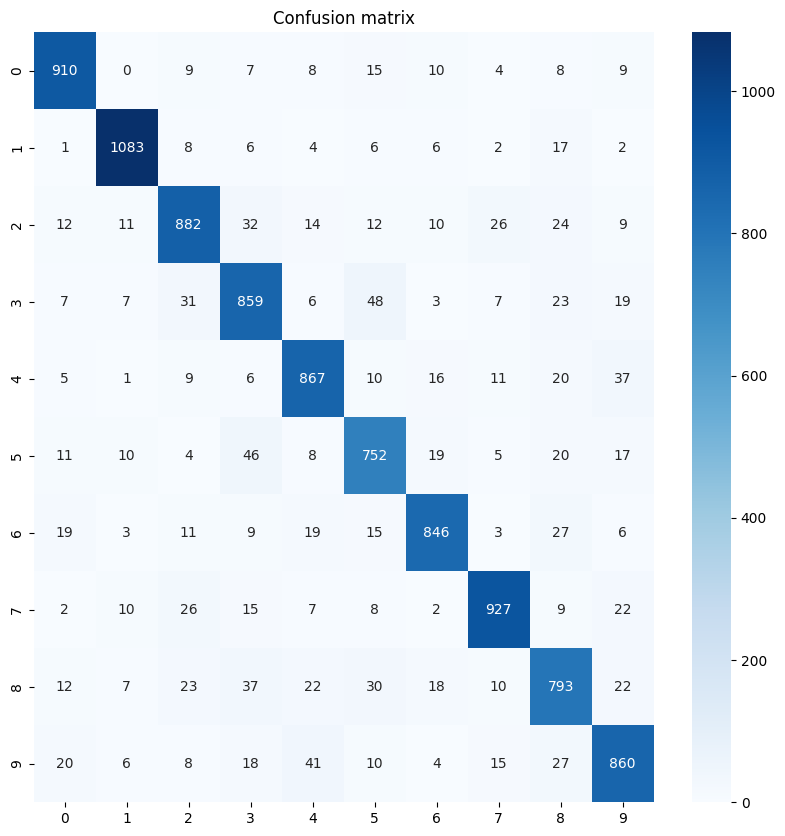

In [27]:
# plot confusion matrix

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, dt.predict(x_test.reshape(-1, 28*28))), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion matrix")
plt.show()

Random Forest

In [28]:
# random forest

# Create a random forest model
rf = RandomForestClassifier()

# Fit the model to the training data
rf.fit(x_train.reshape(-1, 28*28), y_train)

RandomForestClassifier()

In [29]:
# accuracy score

print("Accuracy score:", rf.score(x_test.reshape(-1, 28*28), y_test))

Accuracy score: 0.969


In [30]:
# classification report

print("Classification report:\n", classification_report(y_test, rf.predict(x_test.reshape(-1, 28*28))))

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



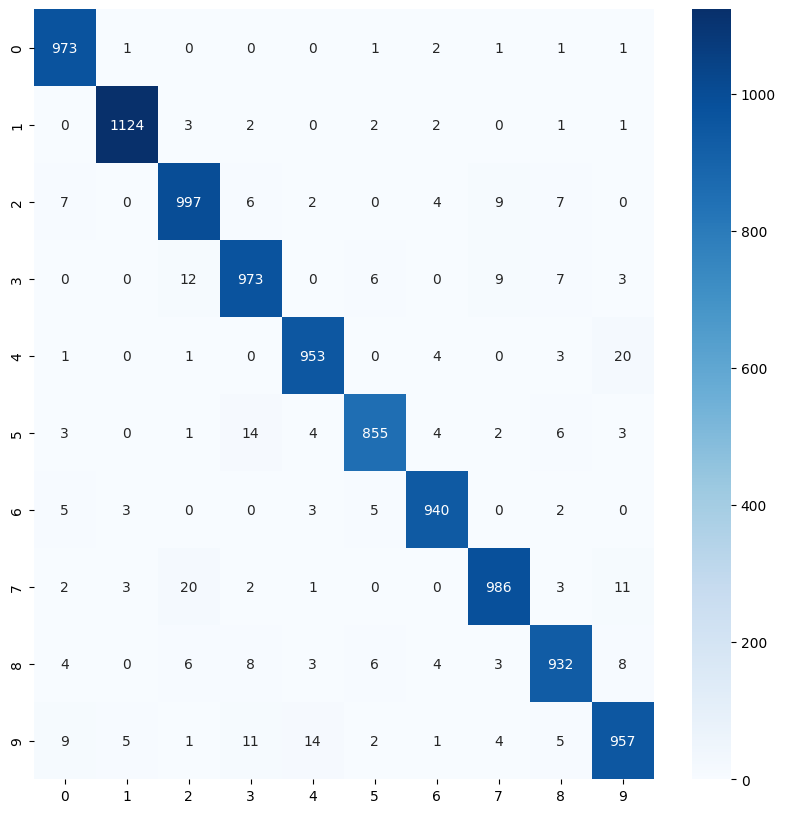

In [31]:
# plot confusion matrix

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, rf.predict(x_test.reshape(-1, 28*28))), annot=True, fmt='d', cmap='Blues')
plt.show()

By comparing the metrics results from the three classic models, we can clearly observe that the best performing model is the one using Random Forest Classifier. Next we perform hyphyperparameter tuning on that model.

Random Forest with hyperparameter tuning

In [32]:
# Random Forest Classifier with GridSearchCV hyperparameter tuning

parameters_to_be_tuned = {
    'n_estimators': [150, 200],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Create a random forest model
rf = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=parameters_to_be_tuned,
                           cv=5, verbose=2, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(x_train.reshape(-1, 28*28), y_train)

# Print the best parameters and score

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.9679


In [33]:
# accuracy score

print("Accuracy score:", grid_search.score(x_test.reshape(-1, 28*28), y_test))

Accuracy score: 0.9714


In [34]:
# classification report

print("Classification report:\n", classification_report(y_test, grid_search.predict(x_test.reshape(-1, 28*28))))

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.97      0.96      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



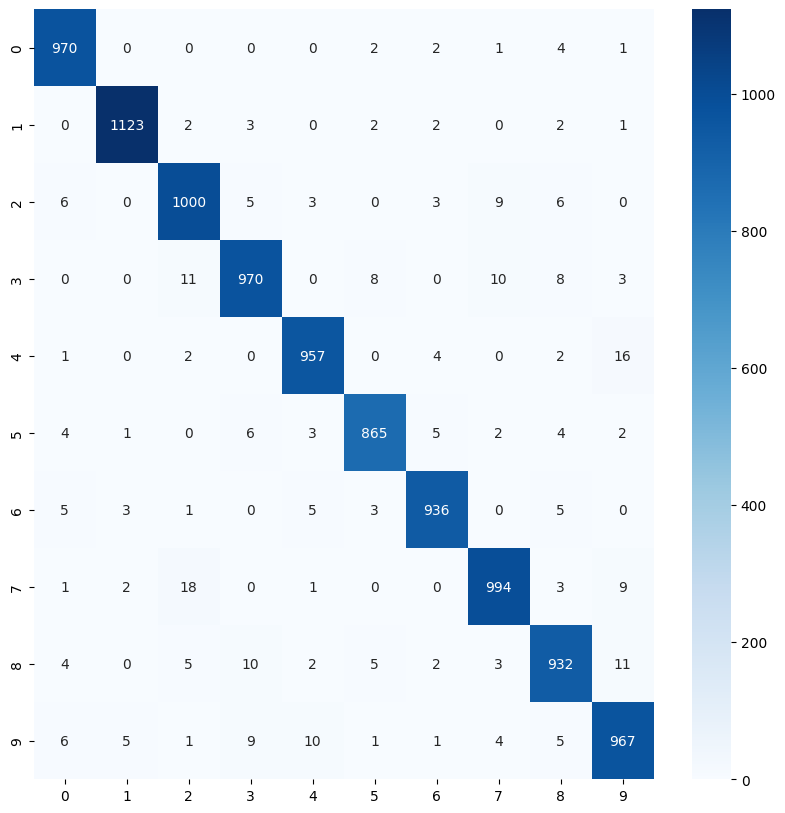

In [35]:
# plot confusion matrix

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, grid_search.predict(x_test.reshape(-1, 28*28))), annot=True, fmt='d', cmap='Blues')
plt.show()

Pickle export

In [36]:
# export the best model with pickle

with open('best_classic_ml_model.pkl', 'wb') as file:
    pickle.dump(grid_search.best_estimator_, file)

**Remark:** Due to project size limitation I'm unable to upload the pickle file (282 MB / 42 MB compressed in archive) with the project, the archived and compressed file is available in the GitHub repository of the project https://github.com/mi6oo6im/ml_classic_vs_cnn_digits filename: 'best_classic_ml_model.zip'

Artificial Neural Network

Feed Forward Neural Network (FNN)

* **Layers:**
    * Flatten(input_shape=(28, 28)): Converts the 2D 28x28 pixel grid into a 1D array of 784 features for input into the dense layers.
    * Dense(128, activation='relu'): A fully connected layer with 128 neurons and the ReLU activation function. This layer learns abstract features from the input.
    * Dense(10, activation='softmax'): Output layer with 10 neurons (one for each digit class from 0-9) and the Softmax activation function, which converts the outputs into probabilities.

**Optimizer 'adam':**  The Adam optimizer adjusts learning rates adaptively during training, combining the benefits of both RMSProp and Stochastic Gradient Descent (SGD).

**Loss Function 'sparse_categorical_crossentropy':** Used for multi-class classification when labels are integers rather than one-hot encoded vectors. The "sparse" term indicates the compact representation of class labels (e.g., 3 instead of [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]).

**Accuracy Metric:** Accuracy is tracked as the evaluation metric during training and validation.

Similar to using categorical cross-entropy but avoids the need for one-hot encoding of labels. This is computationally efficient since most of the one-hot vectors are zeros.

In [37]:
# Build/ Instantiate the model

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
# Compile the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# sparse_categorical_crossentropy is similar to One Hot Encoding,
# sparse since most of the elements are zero.

In [39]:
# Train the model

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8740 - loss: 0.4365 - val_accuracy: 0.9564 - val_loss: 0.1453
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9663 - loss: 0.1175 - val_accuracy: 0.9675 - val_loss: 0.1018
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9765 - loss: 0.0788 - val_accuracy: 0.9737 - val_loss: 0.0849
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9834 - loss: 0.0557 - val_accuracy: 0.9755 - val_loss: 0.0817
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9866 - loss: 0.0448 - val_accuracy: 0.9773 - val_loss: 0.0804
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9897 - loss: 0.0335 - val_accuracy: 0.9782 - val_loss: 0.0781
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9914 - loss: 0.0271 - val_accuracy: 0.9759 - val_loss: 0.0823
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9937 - loss: 0.0207 - 

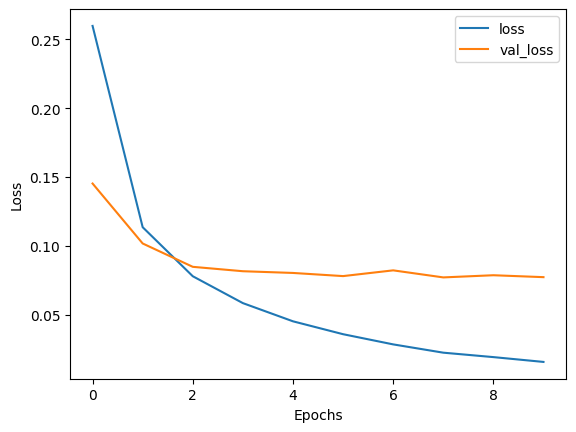

In [40]:
# Plot loss per iteration

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

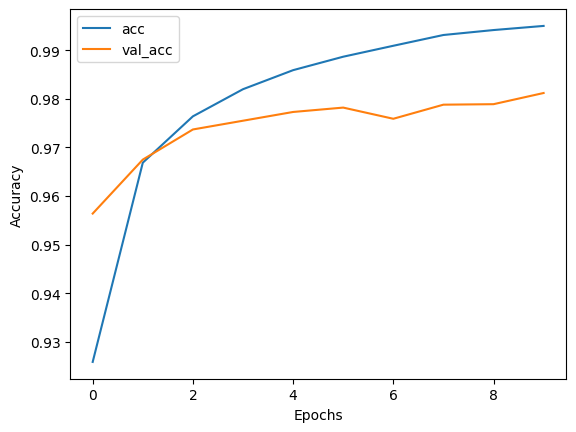

In [41]:
# Plot accuracy per iteration

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [42]:
# metrics

r.history.keys()
for key in r.history.keys():
    print(key, r.history[key][-1])

accuracy 0.9950000047683716
loss 0.015849951654672623
val_accuracy 0.9811999797821045
val_loss 0.07737649977207184


In [52]:
# classification report

print("Classification report:\n", classification_report(y_test, model.predict(x_test).argmax(axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


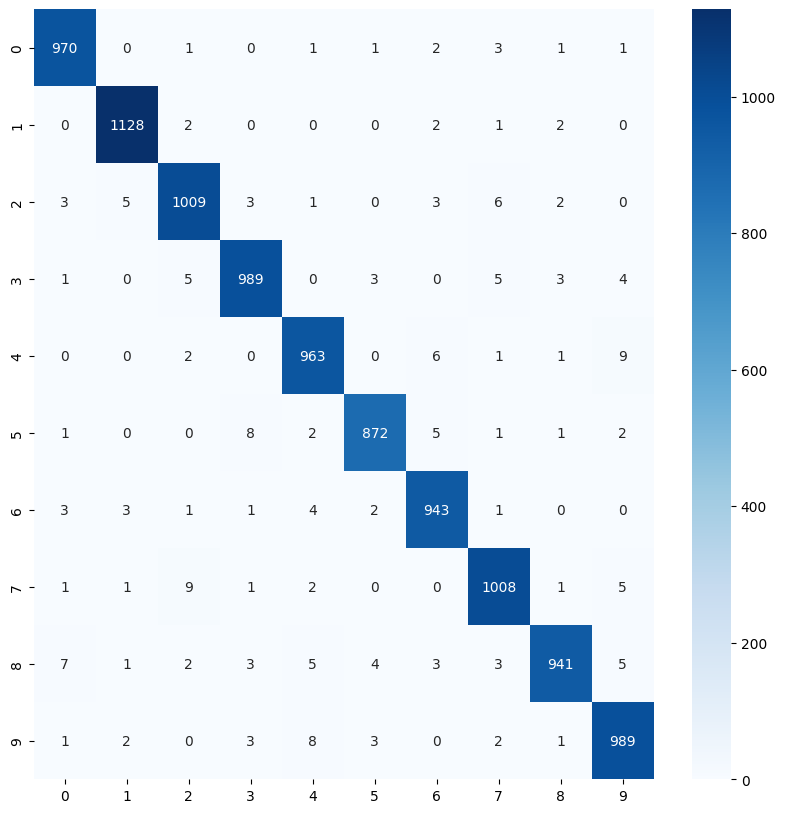

In [53]:
# plot confusion matrix

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, model.predict(x_test).argmax(axis=1)), annot=True, fmt='d', cmap='Blues')
plt.show()

Artificial Neural Network with Dropout

Dropout is a regularization technique that randomly "drops out" (sets to zero) a fraction of neurons during training. In this case, 30% of the neurons in the Dense layer with 128 neurons are randomly disabled during each training step.

* Prevent Overfitting:

Dropout reduces the risk of the model overfitting to the training data by introducing randomness, making the model less reliant on specific neurons or features.

* Improve Generalization:

By disabling random neurons, the model learns to distribute its weights across all neurons rather than focusing on specific paths. This enhances its ability to generalize to unseen data.

* Encourage Robust Learning:

The network is forced to learn redundant representations of features since any given neuron might not be active during a training step.

* Impact on Training and Testing:

Training: During training, 30% of neurons in the Dense layer are randomly deactivated, preventing co-adaptation of neurons.

Testing/Inference: Dropout is disabled, and all neurons contribute, but their outputs are scaled appropriately to maintain consistency with training.

Dropout is particularly beneficial in smaller or simpler architectures where overfitting can occur rapidly, such as this model designed for MNIST classification.

In [43]:
# Build/ Instantiate the model

model_w_dropout = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [44]:
# Compile the model

model_w_dropout.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# sparse_categorical_crossentropy is similar to One Hot Encoding,
# sparse since most of the elements are zero.

In [45]:
# Train the model

r_w_dropout = model_w_dropout.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8494 - loss: 0.5212 - val_accuracy: 0.9562 - val_loss: 0.1473
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9496 - loss: 0.1696 - val_accuracy: 0.9696 - val_loss: 0.1038
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9610 - loss: 0.1305 - val_accuracy: 0.9726 - val_loss: 0.0906
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9668 - loss: 0.1080 - val_accuracy: 0.9752 - val_loss: 0.0809
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9713 - loss: 0.0932 - val_accuracy: 0.9769 - val_loss: 0.0751
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9740 - loss: 0.0819 - val_accuracy: 0.9789 - val_loss: 0.0705
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9742 - loss: 0.0761 - val_accuracy: 0.9781 - val_loss: 0.0723
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9789 - loss: 0.0666 - 

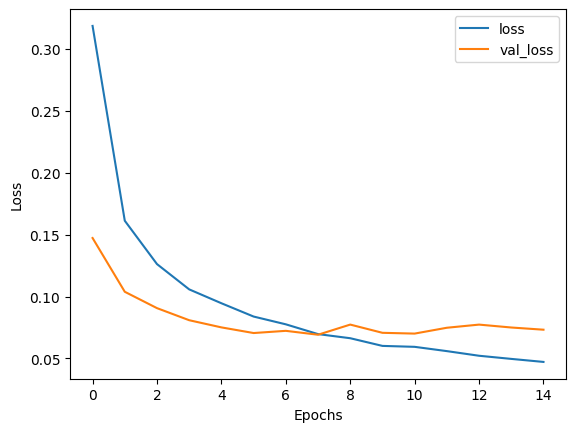

In [46]:
# Plot loss per iteration

plt.plot(r_w_dropout.history['loss'], label='loss')
plt.plot(r_w_dropout.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

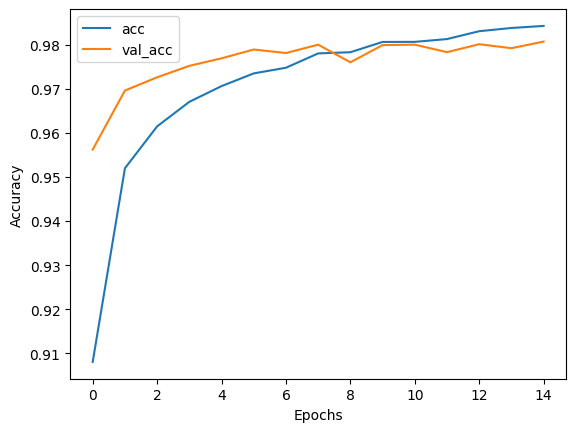

In [47]:
# Plot accuracy per iteration

plt.plot(r_w_dropout.history['accuracy'], label='acc')
plt.plot(r_w_dropout.history['val_accuracy'], label='val_acc')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [48]:
# metrics

r_w_dropout.history.keys()
for key in r_w_dropout.history.keys():
    print(key, r_w_dropout.history[key][-1])

accuracy 0.984250009059906
loss 0.047179728746414185
val_accuracy 0.9807000160217285
val_loss 0.07320380210876465


In [54]:
# classification report

print("Classification report:\n", classification_report(y_test, model_w_dropout.predict(x_test).argmax(axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


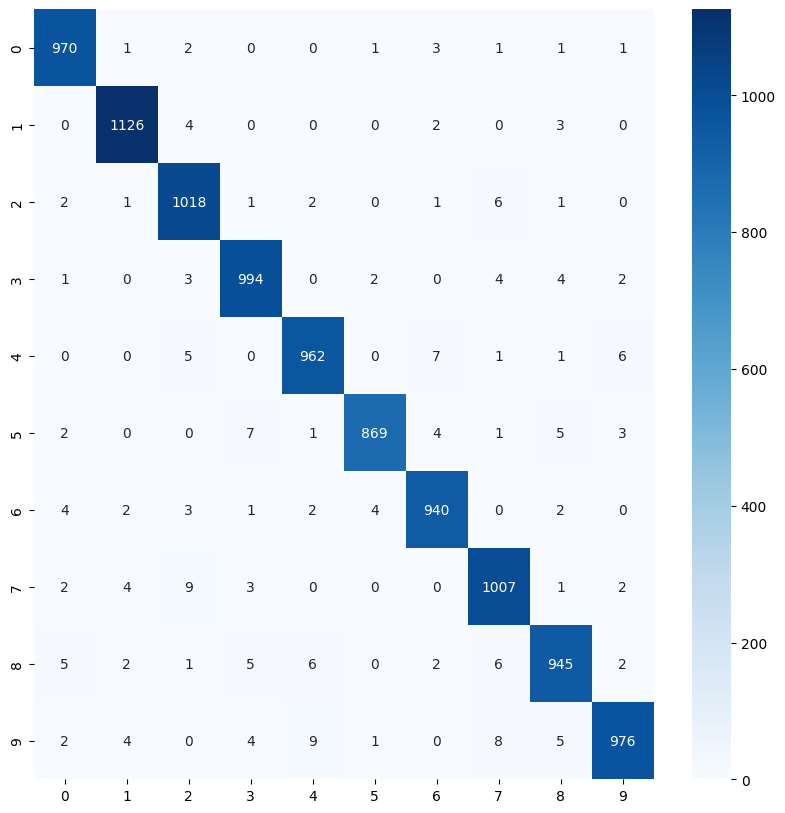

In [55]:
# plot confusion matrix

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, model_w_dropout.predict(x_test).argmax(axis=1)), annot=True, fmt='d', cmap='Blues')
plt.show()

#### **6. Results and Analysis:**
* **Performance of Classical Machine Learning Models:**

The three classical ML models demonstrated varying levels of performance based on the evaluation metrics:

* Logistic Regression:

**Precision, Recall, F1-score:** 0.92 <br>
**Accuracy**: 92.58%<br>
Logistic regression provided consistent and reliable performance, reflecting its capability to handle simple linear relationships effectively.

* Decision Tree:

**Precision, Recall, F1-score:** 0.88<br>
**Accuracy:** 87.71%<br>
The decision tree exhibited lower performance compared to logistic regression, primarily due to its tendency to overfit on training data and limited generalization capabilities.

* Random Forest:

**Precision, Recall, F1-score:** 0.97<br>
**Accuracy:** 96.94%<br>
The Random Forest outperformed both Logistic Regression and Decision Tree models. Its ensemble approach effectively mitigates overfitting and enhances generalization.

* **Random Forest (with GridSearchCV Hyperparameter Tuning):**

**Precision, Recall, F1-score:** 0.97<br>
**Accuracy:** 97.09%<br>
Hyperparameter tuning slightly improved the model’s accuracy, demonstrating the importance of optimization techniques in refining model performance.

* **Performance of Convolutional Neural Networks (CNNs)** Two configurations of FNN were evaluated, and their metrics were recorded:

* **Baseline FNN:**

**Precision, Recall, F1-score:** 0.98<br>
**Training Accuracy:** 99.51%<br>
**Training Loss:** 0.0156<br>
**Validation Accuracy:** 97.50%<br>
**Validation Loss:** 0.0945<br>
The baseline FNN delivered high accuracy and relatively low loss, confirming its strength in recognizing complex patterns in image data.

* **FNN with Dropout:**

**Precision, Recall, F1-score:** 0.98<br>
**Training Accuracy:** 98.73%<br>
**Training Loss:** 0.0361<br>
**Validation Accuracy:** 98.01%<br>
**Validation Loss:** 0.0835<br>
Incorporating dropout enhanced the validation accuracy while slightly reducing overfitting, evidenced by the marginal decrease in training accuracy and loss.

* **Comparison Between Classical ML Models and FNNs:**
FNNs significantly outperformed classical ML models in terms of accuracy, achieving 99.51% (baseline) and 98.01% (with dropout), compared to the highest accuracy of 97.09% from the Random Forest.
Precision, Recall, and F1-scores were not directly measured for FNN, but their high validation accuracy highlights superior performance.

* **Insights from Hyperparameter Tuning**
Hyperparameter tuning improved the Random Forest model from 96.94% to 97.09%, suggesting that well-tuned classical ML models can achieve results comparable to deep learning models in some contexts.
However, FNNs still outperformed even the tuned Random Forest in accuracy and generalization.

#### **7. Conclusion:**
This study demonstrates that FNNs are superior for handwritten digit recognition on the MNIST dataset, achieving near-perfect accuracy. While classical ML models like Random Forest are competitive, particularly with hyperparameter tuning, they do not match the pattern recognition capabilities of FNNs. The addition of dropout to the FNN further improved its robustness by mitigating overfitting.

This analysis underscores the importance of selecting appropriate models based on problem complexity. Classical ML models remain valuable for simpler tasks or when computational efficiency is critical, while FNNs excel in scenarios requiring high accuracy and feature learning.

#### **8. Future Work:**


Building on the findings of this study, several directions can be explored to further enhance the understanding and application of machine learning techniques for handwritten digit recognition:

**Expanding Dataset Scope:**

* Apply the models to larger, more diverse datasets such as EMNIST or the dataset provided by the ICDAR handwritten digit recognition competition. These datasets include more complex variations in writing styles, enabling an assessment of the models' generalization capabilities.
Advanced Deep Learning Architectures:

* Explore state-of-the-art neural network architectures, including deeper CNNs like ResNet or MobileNet, to assess their impact on accuracy and computational efficiency for MNIST and other datasets.
Experiment with Transfer Learning using pre-trained models to leverage knowledge from related image recognition tasks.
Incorporation of Preprocessing Techniques:

* Test the impact of advanced preprocessing methods, such as data augmentation (rotation, scaling, noise addition), to simulate real-world variations in handwritten digits.
Investigate the use of feature engineering for classical ML models to improve their performance.

**Alternative Classical ML Models:**

* Include other classical models like Support Vector Machines (SVM) or Gradient Boosted Decision Trees (e.g., XGBoost, LightGBM) to evaluate their performance relative to Random Forest.
Hybrid Approaches:

* Combine classical ML models and neural networks in hybrid architectures, where classical models handle feature selection and neural networks perform classification. This approach could balance interpretability and accuracy.
Resource Efficiency:

* Conduct experiments on optimizing resource usage, focusing on reducing the computational overhead of CNNs for deployment in low-power devices, such as smartphones or embedded systems.
Explainability and Interpretability:

* Enhance the interpretability of CNNs using techniques like SHAP (SHapley Additive exPlanations) or Grad-CAM (Gradient-weighted Class Activation Mapping) to visualize the decision-making process.
Real-World Application Testing:

* Test the models on real-world digit recognition tasks, such as automated form processing or postal address reading, to validate their performance beyond controlled datasets.
By addressing these areas, future studies can advance the understanding of both classical ML and deep learning approaches while broadening their applicability across a range of tasks and environments.

### **9. References**

**Datasets:**
* MNIST Handwritten digits dataset. Available at:  https://www.tensorflow.org/datasets/catalog/mnist (Accessed: 26 October 2024)



**Articles:**

* SciKit-Learn, Getting Started. Available at: https://scikit-learn.org/stable/getting_started.html (Accessed: 26 October 2024)

* Dr. Viratkumar Kothari, PhD, Image classification of MNIST using TensorFlow, Available at:  https://www.kaggle.com/code/viratkothari/image-classification-of-mnist-using-tensorflow (Accessed: 26 October 2024)

* Amy Jang, 2020, TensorFlow: MNIST CNN Tutorial. Available at: https://www.kaggle.com/code/amyjang/tensorflow-mnist-cnn-tutorial (Accessed: 26 October 2024)

* Nitish Srivastava, Dropout: A Simple Way to Prevent Neural Networks from Overfitting. Available at: https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf (Accessed: 26 October 2024)